In [1]:
# Multi Layer Perceptron Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\fs_train_data_2.csv")

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])

In [6]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,count_families,has_secondary_use,damage_grade
0,30,266,1224,1,25,5,2,2,2,0,...,0,1,0,0,0,0,0,0,0,2
1,17,409,12182,2,0,13,7,2,2,0,...,0,1,0,0,0,0,0,1,0,3
2,17,716,7056,2,5,12,6,1,2,1,...,0,1,0,0,0,0,0,1,0,3
3,4,651,105,2,80,5,4,0,2,0,...,0,1,0,0,0,0,0,1,0,2
4,3,1387,3909,5,40,5,10,2,2,0,...,0,0,0,1,0,0,0,1,0,2


In [7]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,23].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [9]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6515/6515 [==============================] - 8s 1ms/step - loss: 0.7751 - accuracy: 0.6174 - val_loss: 0.7537 - val_accuracy: 0.6336
Epoch 2/10
6515/6515 [==============================] - 7s 1ms/step - loss: 0.7296 - accuracy: 0.6517 - val_loss: 0.7160 - val_accuracy: 0.6599
Epoch 3/10
6515/6515 [==============================] - 7s 1ms/step - loss: 0.7116 - accuracy: 0.6621 - val_loss: 0.7102 - val_accuracy: 0.6661
Epoch 4/10
6515/6515 [==============================] - 7s 1ms/step - loss: 0.7028 - accuracy: 0.6688 - val_loss: 0.7072 - val_accuracy: 0.6628
Epoch 5/10
6515/6515 [==============================] - 7s 1ms/step - loss: 0.6972 - accuracy: 0.6728 - val_loss: 0.7023 - val_accuracy: 0.6701
Epoch 6/10
6515/6515 [==============================] - 7s 1ms/step - loss: 0.6927 - accuracy: 0.6752 - val_loss: 0.6947 - val_accuracy: 0.6733
Epoch 7/10
6515/6515 [==============================] - 7s 1ms/step - loss: 0.6890 - accuracy: 0.6776 - val_loss: 0.6950 - val_accuracy:

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1629/1629 [==============================] - 1s 805us/step - loss: 0.6909 - accuracy: 0.6767
Test accuracy: 0.6766946315765381


In [13]:
y_pred = model.predict(X_test)

1629/1629 [==============================] - 1s 636us/step


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           1       0.60      0.40      0.48      4840
           2       0.68      0.84      0.75     29750
           3       0.70      0.47      0.56     17531

    accuracy                           0.68     52121
   macro avg       0.66      0.57      0.60     52121
weighted avg       0.68      0.68      0.66     52121



In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


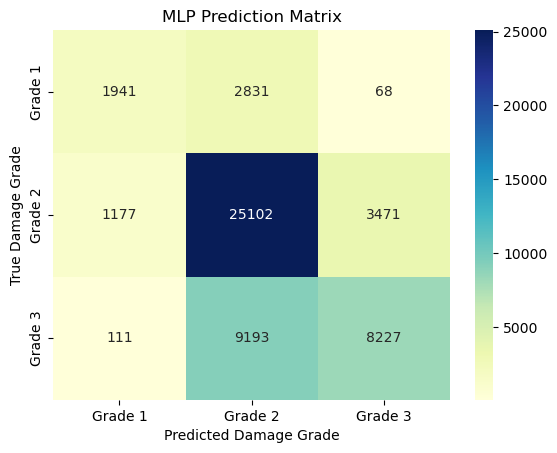

In [16]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
plt.title("MLP Prediction Matrix")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()